# 实验题目 1：拉格朗日（Lagrange）插值

## 问题分析

> 准确描述并总结出实验题目（摘要），并准确分析原题的目的和意义。

### 方法概要

给定平面上$n+1$个不同的数据点$(x_k, f(x_k)), k=0,1,\cdots,n, x_i \neq x_j, i \neq j$则满足条件

$$
P_n(x_k) = f(x_k), k = 0, 1, \cdots, n
$$

的$n$次拉格朗日插值多项式

$$
P_n(x) = \displaystyle\Sigma^n_{k=0}f(x_k)l_k(x)
$$

是存在唯一的。若$x_k\in[a, b], k = 0, 1, \cdots, n$，且函数$f(x)$充分光滑，则当$x\in[a,b]$时，有误差估计式

$$
f(x) - P_n(x) = \frac{f^{n+1}(\xi)}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n), \xi \in[a,b]
$$

### 实验目的

利用拉格朗日插值多项式 $P_n(x)$ 求 $f(x)$ 的近似值。

**输入：** $n+1$个数据点$x_k,f(x_k), k=0,1,\cdots,n$、插值点$x$

**输出：** $f(x)$在插值点$x$的近似值$P_n(x)$

## 数学原理

> 数学原理表达清晰且书写准确。

### 证明 $P_n(x)$ 存在且唯一


**证明：** 使用归纳法证明。

当 $n=0$，一定存在 $P_0(x) = C = f_0(x)$ 满足要求。

假设当 $n=k-1$ 时，存在满足要求的 $P_{k-1}(x)$，则当 $n=k$，有

$$
P_{k}(x) = P_{k-1}(x) + c(x-x_0)(x-x_1)\cdots(x-x_{k-1})(x-x_k), \ \text{c为系数}
$$

则$\because P_n(x_n) = f(x_n), \therefore$ 参数 $c$ 是可求的，故 $P_n(x)$ 是存在的。

由多项式基本定理，$\because P_n(x) \text{的次数} \leq n, \therefore P_n(x)$ 是唯一存在的。

### 计算方法

对平面上 $n+1$ 个点 $(x_k,f(x_k)), k=0,1,\cdots,n, x_i\neq x_j,i\neq j$ 定义 $n$ 次多项式：

$$
L_k(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_{k-1})(x-x_{k+1})\cdots(x-x_k)}{(x_k-x_0)(x_k-x_1)\cdots (x_k-x_{k-1})(x_k-x_{k+1})\cdots(x_k-x_n)}
$$

则 $L_k(x_k)=1,L_k(x_m)=0,m\neq k$。

定义：

$$
P_{n}(x) = f(x_0)L_0(x) + f(x_1)L_1(x) + \cdots + f(x_n)L_n(x) = \displaystyle\Sigma^{n}_{k=0}f(x_k)L_x(x)
$$

为 $f(x)$ 的$n$次拉格朗日插值多项式。

## 程序设计流程

> 编译通过，根据输入能得到正确输出。

In [9]:
# 引入需要的包
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt

In [10]:
# L_k(x)
def L(k, x_list: np.ndarray):
    def l(x: float):
        x_k = x_list[k]
        slice = np.array([*x_list[:k], *x_list[k+1:]])
        repeat = np.array([x, ] * (len(x_list) - 1))
        repeat_k = np.array([x_k, ] * (len(x_list) - 1))
        return np.prod(repeat - slice) / np.prod(repeat_k - slice)
    return l

# 拉格朗日多项式 P_n(x)
def P(f, x_list: np.ndarray, x: float):
    return np.sum([f(x_list[k]) * L(k, x_list)(x) for k in range(len(x_list))])

### 问题一

问题 1：拉格朗日插值多项式的次数 n 越大越好吗？
(1) 考虑 f(x) = 1 / (1 + x^2) in [-5, 5]
          5       10      20
0.75  0.9054  0.6907  0.6413
1.75  0.5258  0.2330  0.2491
2.75  0.0096  0.1122  0.1282
3.75 -0.3568  0.1084  0.1903
4.75 -0.1595 -0.2360  6.4150
差值：
          5       10      20
0.75 -0.2654 -0.0507 -0.0013
1.75 -0.2796  0.0132 -0.0029
2.75  0.1072  0.0045 -0.0114
3.75  0.4232 -0.0420 -0.1239
4.75  0.2020  0.2785 -6.3726
(2) 考虑 f(x) = e^x in [-1, 1]
           5       10      20
-0.95  0.3863  0.3867  0.3867
-0.05  0.9513  0.9512  0.9512
 0.05  1.0512  1.0513  1.0513
 0.95  2.5863  2.5857  2.5857
差值：
           5    10   20
-0.95  0.0004 -0.0  0.0
-0.05 -0.0001 -0.0  0.0
 0.05  0.0001 -0.0 -0.0
 0.95 -0.0006 -0.0 -0.0
画出两个函数以及其拉格朗日多项式的图像：


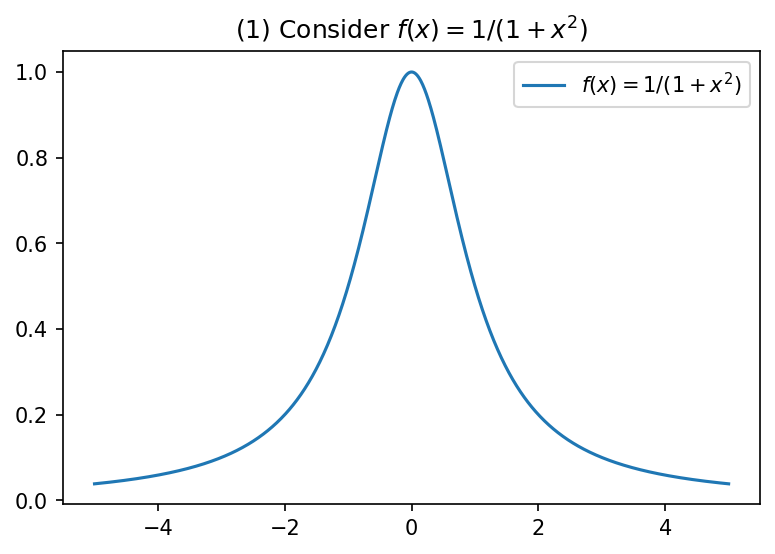

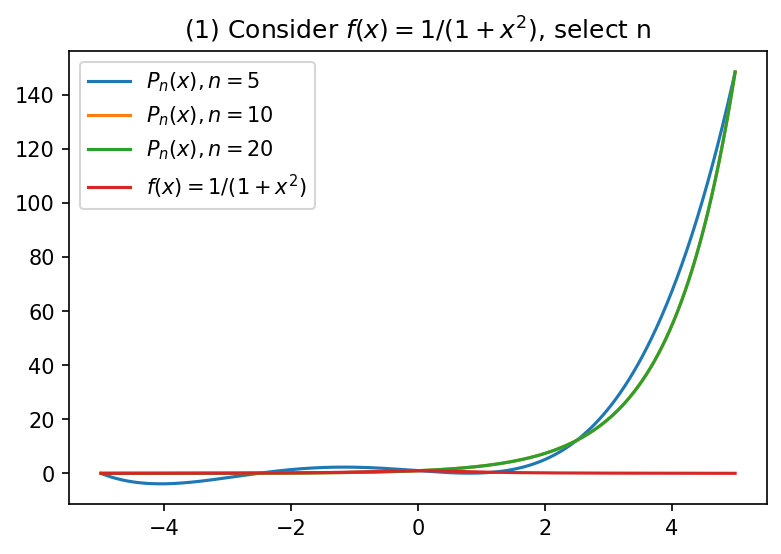

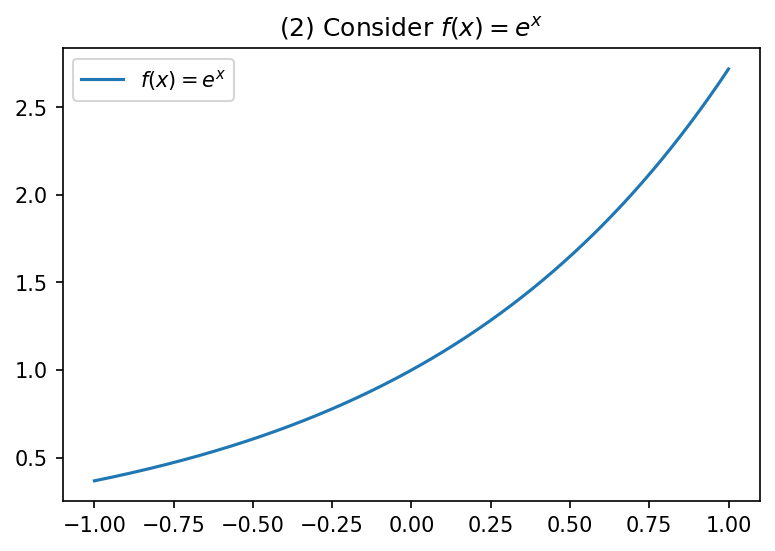

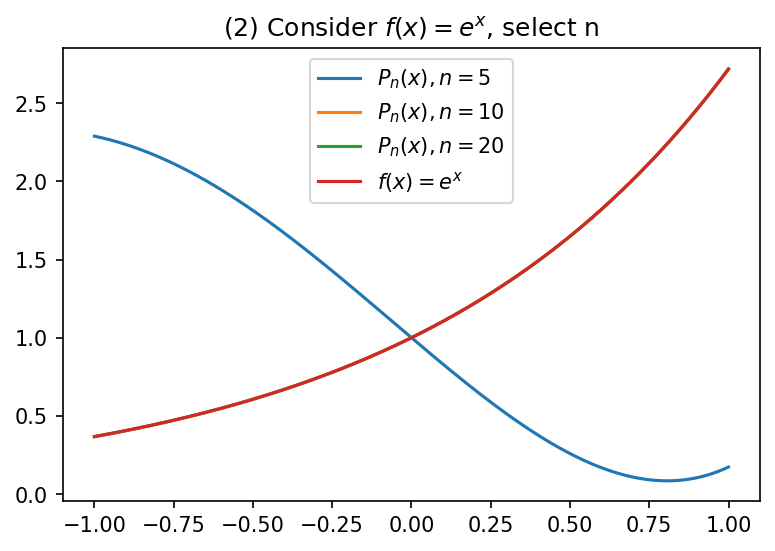

In [11]:
def problem1():
    print("问题 1：拉格朗日插值多项式的次数 n 越大越好吗？")

    def sub(targets_x, targets_n, solve):
        return DataFrame({n: {x: solve(n, x) for x in targets_x} for n in targets_n}).round(4)

    print("(1) 考虑 f(x) = 1 / (1 + x^2) in [-5, 5]")
    targets_x_1 = [0.75, 1.75, 2.75, 3.75, 4.75]
    targets_n = [5, 10, 20]
    print(sub(
        targets_x=targets_x_1,
        targets_n=targets_n,
        solve=lambda n_i, x: P(
            lambda x_i: 1 / (1 + x_i ** 2), np.linspace(-5, 5, n_i), x
        )
    ))
    print("差值：")
    print(sub(
        targets_x=targets_x_1,
        targets_n=targets_n,
        solve=lambda n_i, x: ((1 / (1 + x ** 2)) - P(
            lambda x_i: 1 / (1 + x_i ** 2), np.linspace(-5, 5, n_i), x
        ))
    ))

    print("(2) 考虑 f(x) = e^x in [-1, 1]")
    targets_x_2 = [-0.95, -0.05, 0.05, 0.95]
    print(sub(
        targets_x=targets_x_2,
        targets_n=targets_n,
        solve=lambda n_i, x: P(lambda x_i: np.e ** x_i,
                               np.linspace(-1, 1, n_i), x)
    ))
    print("差值：")
    print(sub(
        targets_x=targets_x_2,
        targets_n=targets_n,
        solve=lambda n_i, x: (np.e ** x - P(lambda x_i: np.e ** x_i,
                                            np.linspace(-1, 1, n_i), x))
    ))
    print("画出两个函数以及其拉格朗日多项式的图像：")
    slice_fluent_size = 1000
    x_linespace_2 = np.linspace(-1, 1, slice_fluent_size)
    x_linespace_10 = np.linspace(-5, 5, slice_fluent_size)
    y1 = 1 / (1 + x_linespace_10**2)
    Ls1 = {n_i: np.array([P(lambda x_i: np.e ** x_i, np.linspace(-5, 5, n_i), x)
                        for x in x_linespace_10]) for n_i in targets_n}
    plt.figure(dpi=150)
    plt.title("(1) Consider $f(x) = 1 / (1 + x^2)$")
    plt.legend(handles=plt.plot(x_linespace_10, y1, label="$f(x) = 1 / (1 + x^2)$"), loc='best')
    plt.figure(dpi=150)
    plt.title("(1) Consider $f(x) = 1 / (1 + x^2)$, select n")
    plt.legend(handles=[*[plt.plot(x_linespace_10, Ls1[n_i], label=f"$P_n(x),n={n_i}$")[0] for n_i in Ls1], 
                        plt.plot(x_linespace_10, y1, label="$f(x) = 1 / (1 + x^2)$")[0]], loc='best')
    y2 = np.e**x_linespace_2
    Ls2 = {n_i: np.array([P(lambda x_i: np.e ** x_i, np.linspace(-5, 5, n_i), x)
                        for x in x_linespace_2]) for n_i in targets_n}
    plt.figure(dpi=150)
    plt.title("(2) Consider $f(x) = e^x$")
    plt.legend(handles=plt.plot(x_linespace_2, y2, label="$f(x) = e^x$"), loc='best')
    plt.figure(dpi=150)
    plt.title("(2) Consider $f(x) = e^x$, select n")
    plt.legend(handles=[*[plt.plot(x_linespace_2, Ls2[n_i], label=f"$P_n(x),n={n_i}$")[0] for n_i in Ls2], 
                        plt.plot(x_linespace_2, y2, label="$f(x) = e^x$")[0]], loc='best')
    


problem1()


### 问题二

问题 2：插值区间越小越好吗？
(1) 考虑 f(x) = 1 / (1 + x^2) in [-1, 1]
           5       10      20
-0.95  0.8499  0.6013  0.5213
-0.05  0.9996  0.8607  0.9905
 0.05  0.9996  0.8607  0.9905
 0.95  0.8499  0.6013  0.5213
差值：
           5       10      20
-0.95 -0.3243 -0.0757  0.0044
-0.05 -0.0021  0.1368  0.0070
 0.05 -0.0021  0.1368  0.0070
 0.95 -0.3243 -0.0757  0.0044
(2) 考虑 f(x) = e^x in [-5, 5]
           5         10          20
0.75   2.1180    2.1170      2.1170
1.75   5.6343    5.7546      5.7546
2.75  13.6951   15.6357     15.2270
3.75  29.7101   42.3238   -237.3955
4.75  58.1314  113.0561 -19138.6250
差值：
           5       10          20
0.75  -0.0010  0.0000     -0.0000
1.75   0.1203  0.0000      0.0000
2.75   1.9475  0.0069      0.4156
3.75  12.8110  0.1973    279.9166
4.75  57.4529  2.5282  19254.2093
画出两个函数以及其拉格朗日多项式的图像：


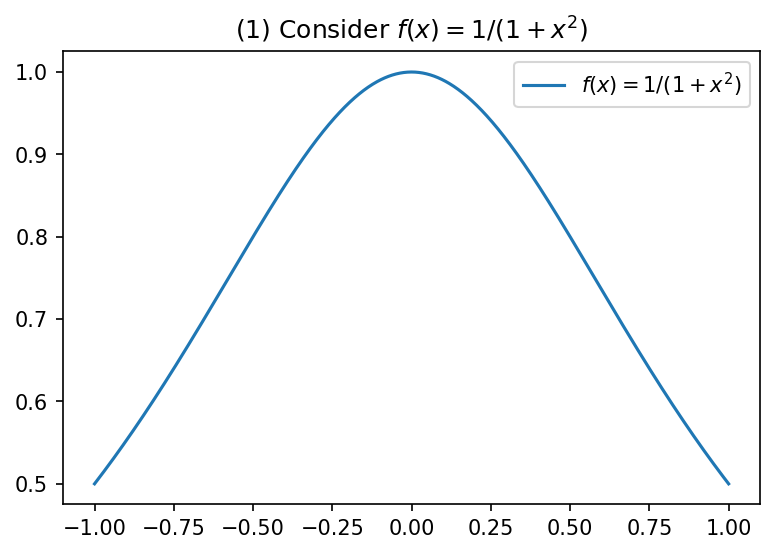

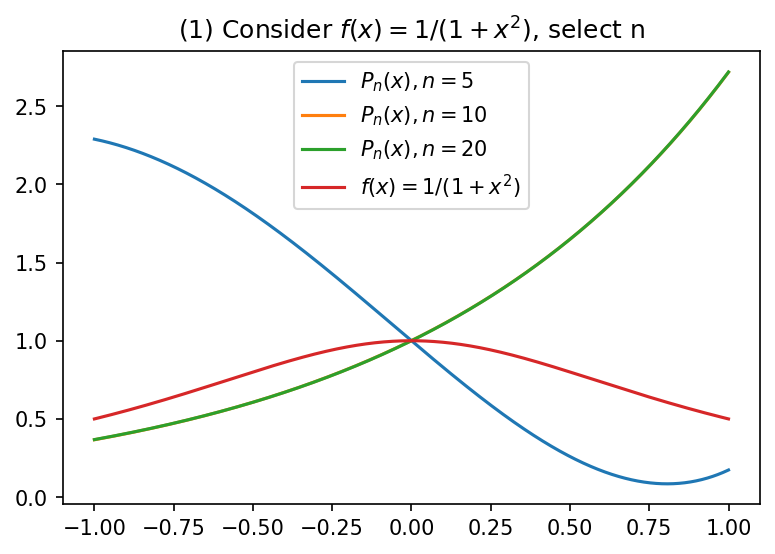

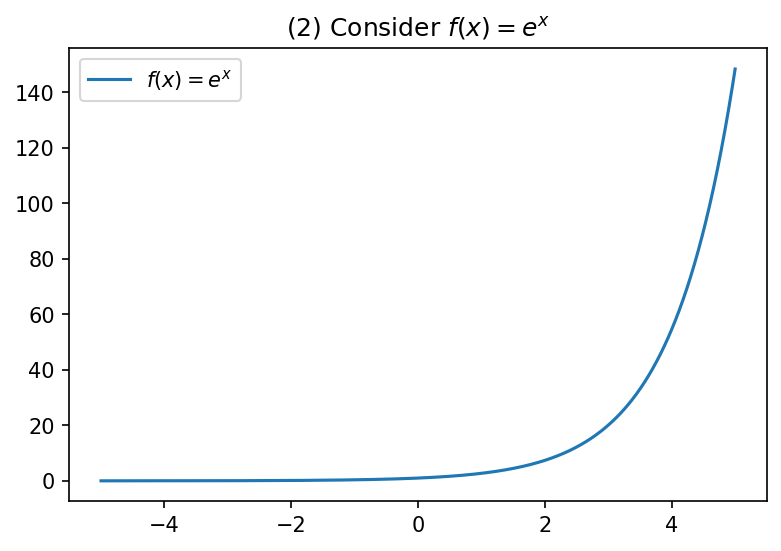

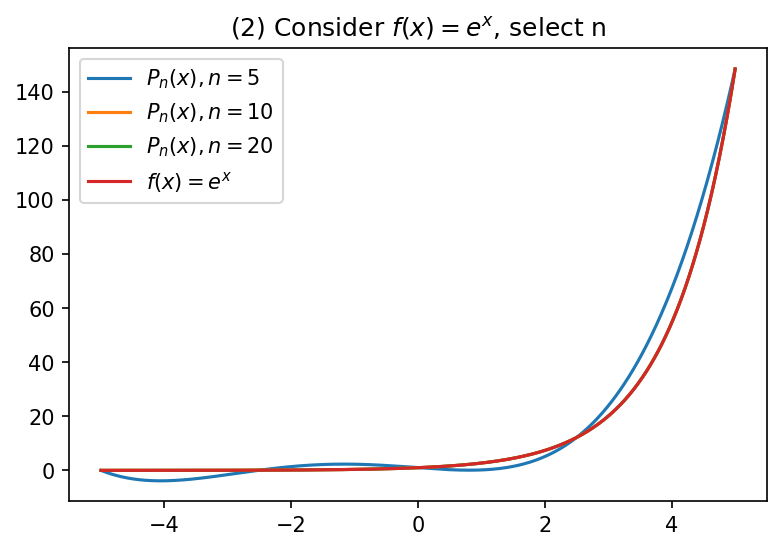

In [12]:
def problem2():
    print("问题 2：插值区间越小越好吗？")

    def sub(targets_x, targets_n, solve):
        return DataFrame({n: {x: solve(n, x) for x in targets_x} for n in targets_n}).round(4)

    print("(1) 考虑 f(x) = 1 / (1 + x^2) in [-1, 1]")
    targets_x_1 = [-0.95, -0.05, 0.05, 0.95]
    targets_n = [5, 10, 20]
    print(sub(
        targets_x=targets_x_1,
        targets_n=targets_n,
        solve=lambda n_i, x: P(
            lambda x_i: 1 / (1 + x_i ** 2), np.linspace(-5, 5, n_i), x
        )
    ))
    print("差值：")
    print(sub(
        targets_x=targets_x_1,
        targets_n=targets_n,
        solve=lambda n_i, x: ((1 / (1 + x ** 2)) - P(
            lambda x_i: 1 / (1 + x_i ** 2), np.linspace(-5, 5, n_i), x
        ))
    ))

    print("(2) 考虑 f(x) = e^x in [-5, 5]")
    targets_x_2 = [0.75, 1.75, 2.75, 3.75, 4.75]
    print(sub(
        targets_x=targets_x_2,
        targets_n=targets_n,
        solve=lambda n_i, x: P(lambda x_i: np.e ** x_i,
                               np.linspace(-1, 1, n_i), x)
    ))
    print("差值：")
    print(sub(
        targets_x=targets_x_2,
        targets_n=targets_n,
        solve=lambda n_i, x: (np.e ** x - P(lambda x_i: np.e ** x_i,
                                            np.linspace(-1, 1, n_i), x))
    ))
    print("画出两个函数以及其拉格朗日多项式的图像：")
    slice_fluent_size = 1000
    x_linespace_2 = np.linspace(-1, 1, slice_fluent_size)
    x_linespace_10 = np.linspace(-5, 5, slice_fluent_size)
    y1 = 1 / (1 + x_linespace_2**2)
    Ls1 = {n_i: np.array([P(lambda x_i: np.e ** x_i, np.linspace(-5, 5, n_i), x)
                        for x in x_linespace_2]) for n_i in targets_n}
    plt.figure(dpi=150)
    plt.title("(1) Consider $f(x) = 1 / (1 + x^2)$")
    plt.legend(handles=plt.plot(x_linespace_2, y1, label="$f(x) = 1 / (1 + x^2)$"), loc='best')
    plt.figure(dpi=150)
    plt.title("(1) Consider $f(x) = 1 / (1 + x^2)$, select n")
    plt.legend(handles=[*[plt.plot(x_linespace_2, Ls1[n_i], label=f"$P_n(x),n={n_i}$")[0] for n_i in Ls1], 
                        plt.plot(x_linespace_2, y1, label="$f(x) = 1 / (1 + x^2)$")[0]], loc='best')
    y2 = np.e**x_linespace_10
    Ls2 = {n_i: np.array([P(lambda x_i: np.e ** x_i, np.linspace(-5, 5, n_i), x)
                        for x in x_linespace_10]) for n_i in targets_n}
    plt.figure(dpi=150)
    plt.title("(2) Consider $f(x) = e^x$")
    plt.legend(handles=plt.plot(x_linespace_10, y2, label="$f(x) = e^x$"), loc='best')
    plt.figure(dpi=150)
    plt.title("(2) Consider $f(x) = e^x$, select n")
    plt.legend(handles=[*[plt.plot(x_linespace_10, Ls2[n_i], label=f"$P_n(x),n={n_i}$")[0] for n_i in Ls2], 
                        plt.plot(x_linespace_10, y2, label="$f(x) = e^x$")[0]], loc='best')
    


problem2()


### 问题四

In [13]:
def problem4():
    print("问题 4：考虑拉格朗日插值问题，内插比外推更可靠吗？")

    def f(x: float):
        return np.sqrt(x)

    target_x = [5, 50, 115, 185]

    print("考虑函数 f(x) = sqrt(x)")

    def do_by_node(index: int, nodes: list):
        print(f"({index}) 考虑以", ", ".join(
            [f"x_{i} = {nodes[i]}" for i in range(3)]), "为节点的拉格朗日插值多项式 P_2(x)")
        print(DataFrame({
            "函数值": {x: P(f, nodes, x) for x in target_x},
            "f(x)": {x: f(x) for x in target_x},
            "差值": {x: f(x) - P(f, nodes, x) for x in target_x}
        }).round(4))
        mean = np.mean([f(x) - P(f, nodes, x) for x in target_x])
        print("平均差值:", mean)
        return mean

    nodes_data = [
        [(i + 1) ** 2 for i in range(3)],
        [(i + 5) ** 2 for i in range(3)],
        [(i + 9) ** 2 for i in range(3)],
        [(i + 12) ** 2 for i in range(3)]
    ]
    means = [do_by_node(i + 1, nodes=nodes_data[i])
             for i in range(len(nodes_data))]
    return DataFrame({
        "x_0,x_1,x_2": [",".join([str(n) for n in nodes_data[i]]) for i in range(len(nodes_data))],
        "平均差值": [means[i] for i in range(len(nodes_data))]
    }).round(4)


problem4()


问题 4：考虑拉格朗日插值问题，内插比外推更可靠吗？
考虑函数 f(x) = sqrt(x)
(1) 考虑以 x_0 = 1, x_1 = 4, x_2 = 9 为节点的拉格朗日插值多项式 P_2(x)
          函数值     f(x)        差值
5      2.2667   2.2361   -0.0306
50   -20.2333   7.0711   27.3044
115 -171.9000  10.7238  182.6238
185 -492.7333  13.6015  506.3348
平均差值: 179.05810289821613
(2) 考虑以 x_0 = 25, x_1 = 36, x_2 = 49 为节点的拉格朗日插值多项式 P_2(x)
        函数值     f(x)      差值
5    2.8205   2.2361 -0.5844
50   7.0688   7.0711  0.0023
115  9.0385  10.7238  1.6853
185  5.6527  13.6015  7.9488
平均差值: 2.262998003111167
(3) 考虑以 x_0 = 81, x_1 = 100, x_2 = 121 为节点的拉格朗日插值多项式 P_2(x)
         函数值     f(x)      差值
5     4.0952   2.2361 -1.8592
50    7.1742   7.0711 -0.1031
115  10.7256  10.7238 -0.0018
185  13.3659  13.6015  0.2356
平均差值: -0.4321226656936905
(4) 考虑以 x_0 = 144, x_1 = 169, x_2 = 196 为节点的拉格朗日插值多项式 P_2(x)
         函数值     f(x)      差值
5     5.1411   2.2361 -2.9050
50    7.6026   7.0711 -0.5316
115  10.7508  10.7238 -0.0270
185  13.6026  13.6015 -0.0012
平均差值: -0.8661706060574215


,"x_0,x_1,x_2",平均差值
0,"1,4,9",179.0581
1,"25,36,49",2.2630
2,"81,100,121",-0.4321
3,"144,169,196",-0.8662


## 实验结果

> 准确规范地给出各个实验题目的结果，并对相应的思考题给出正确合理的回答与说明。

由题目（1）代码、数据和图像可知：

1. 对 $f(x) = 1/(1+x^2)$ 函数而言，在 $[-5,5]$ 范围内，并不是 $n$ 越大越好，$n$ 越大反而误差增大。
2. 对 $f(x) = e^x$ 函数而言，在 $[-1,1]$ 范围内，$n$ 越大拟合效果越好。

所以不是 $n$ 越大越好，需要结合具体函数考虑。


由题目（2）代码、数据和图像，并且结合题目（1）的数据可知：

1. 对 $f(x) = 1/(1+x^2)$ 函数而言，$[-1, 1]$ 差值区间效果要比 $[-5, 5]$ 好。
2. 对 $f(x) = e^x$ 函数而言，$[-5, 5]$ 差值区间效果要比 $[-1, 1]$ 好。

所以不是差值区间越小越好，需要结合具体函数考虑。


由题目（4）代码、数据和图像，对函数 $f(x) = \sqrt{x}$，内插确实比外推可靠。

**思考题**

*对问题一存在的问题，应该如何解决？*

问题一中，$f(x)=\frac{1}{1+x^2}$ 在 $[-5,5]$ 的差值区间、$n\in\{10, 20\}$ 的情况下拟合效果并不好，$n = 10, n = 20$ 的时候多项式在 $x$ 较大的时候明显偏大。

由实验数据可知不应选择过大的插值多项式次数，$n$ 应该 $<10$。

*对问题二中存在的问题的回答，试加以说明。*

插值区间不是越小越好，如这两个函数：$f(x) = \frac{1}{1+x^2}$ 和 $f(x) = e^x$，前者在 $[-1,1]$ 上插值效果较好而在 $[-5,5]$ 上效果不好；后者在 $[-1,1]$ 上效果不好而在 $[-5,5]$ 上效果较好。

*如何理解插值问题中的内插和外推？*

内插即只对已知数据集内部范围的点的插值运算，外推即对已知数据集外部范围的点进行插值运算。

内插运算比外推更可靠，偏差更小的原因是内插能够更加有效地利用已知数据集的限制条件，尽量利用已知的信息进行计算推测，故更加可靠。